## Technical Expertise

In [11]:
!pip install pandasql

In [12]:
# Import generic libraries
import numpy as np # numerical calc package
import pandas as pd # holds data
from pandasql import sqldf
import zipfile
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
#sns.set(rc={'figure.figsize':(20,10)})

In [13]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)
print("Files:", os.listdir(path))

Path to dataset files: /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2
Files: ['olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'olist_geolocation_dataset.csv', 'product_category_name_translation.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_orders_dataset.csv', 'olist_customers_dataset.csv']


In [14]:
# Define the dataset path
dataset_path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

# Load the CSV files into pandas dataframes
orders_df = pd.read_csv(f"{dataset_path}/olist_orders_dataset.csv")
customers_df = pd.read_csv(f"{dataset_path}/olist_customers_dataset.csv")
order_items_df = pd.read_csv(f"{dataset_path}/olist_order_items_dataset.csv")
order_reviews_df = pd.read_csv(f"{dataset_path}/olist_order_reviews_dataset.csv")
order_payments_df = pd.read_csv(f"{dataset_path}/olist_order_payments_dataset.csv")
#products_df = pd.read_csv(f"{dataset_path}/olist_products_dataset.csv")
sellers_df = pd.read_csv(f"{dataset_path}/olist_sellers_dataset.csv")
geolocation_df = pd.read_csv(f"{dataset_path}/olist_geolocation_dataset.csv")
category_translation_df = pd.read_csv(f"{dataset_path}/product_category_name_translation.csv")

In [15]:
closed_deals_df = pd.read_csv("/content/olist_closed_deals_dataset.csv")
marketing_leads_df = pd.read_csv("/content/olist_marketing_qualified_leads_dataset.csv")
products_df = pd.read_csv("/content/olist_products_dataset.csv")

# Easy Questions

### 1. How many closed deal were won in Q3 of 2018?

In [16]:
# 1. How many closed deal were won in Q3 of 2018?

query = """
SELECT COUNT(*) AS total_won_deals
FROM closed_deals_df
WHERE strftime('%Y-%m', won_date) BETWEEN '2018-07' AND '2018-09'
"""
result = sqldf(query, globals())
result

,total_won_deals
0,93


<ipython-input-17-5b2905da0743>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='month', y='total_won_deals', data=result, palette='Blues_d')


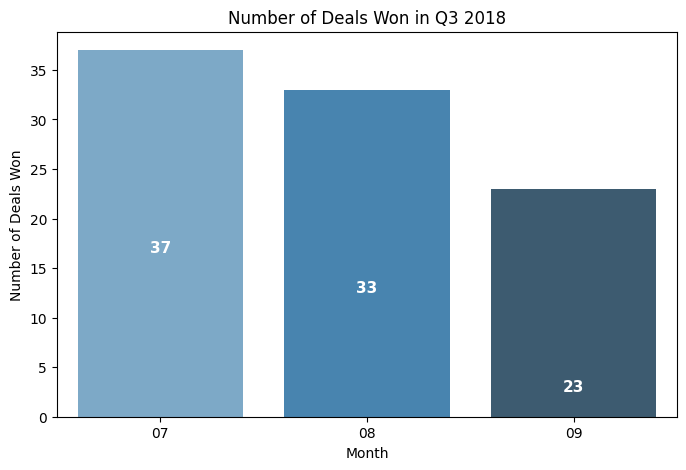

In [17]:
# Data - Won Deals in Q3 2018
query = """
SELECT COUNT(*) AS total_won_deals,
       strftime('%m', won_date) AS month
FROM closed_deals_df
WHERE strftime('%Y', won_date) = '2018' AND strftime('%m', won_date) BETWEEN '07' AND '09'
GROUP BY month
"""
result = sqldf(query, globals())

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='month', y='total_won_deals', data=result, palette='Blues_d')

# Add labels inside the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() - 20),  # Position label inside
                ha='center', va='center',
                fontsize=11, color='white', fontweight='bold')

plt.title('Number of Deals Won in Q3 2018')
plt.xlabel('Month')
plt.ylabel('Number of Deals Won')
plt.show()

### 2. What is the average weight of ‘electronicos’ in kilograms?

In [18]:
# 2. What is the average weight of ‘electronicos’ in kilograms?

query = """
SELECT AVG(product_weight_g)/1000 AS avg_weight_kg
FROM products_df
WHERE product_category_name = 'eletronicos'
AND product_weight_g IS NOT NULL
"""
result = sqldf(query, globals())
result

,avg_weight_kg
0,1.275085


<ipython-input-19-2c31ceb01930>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_weight_kg', y='product_category_name', data=result, palette='coolwarm')


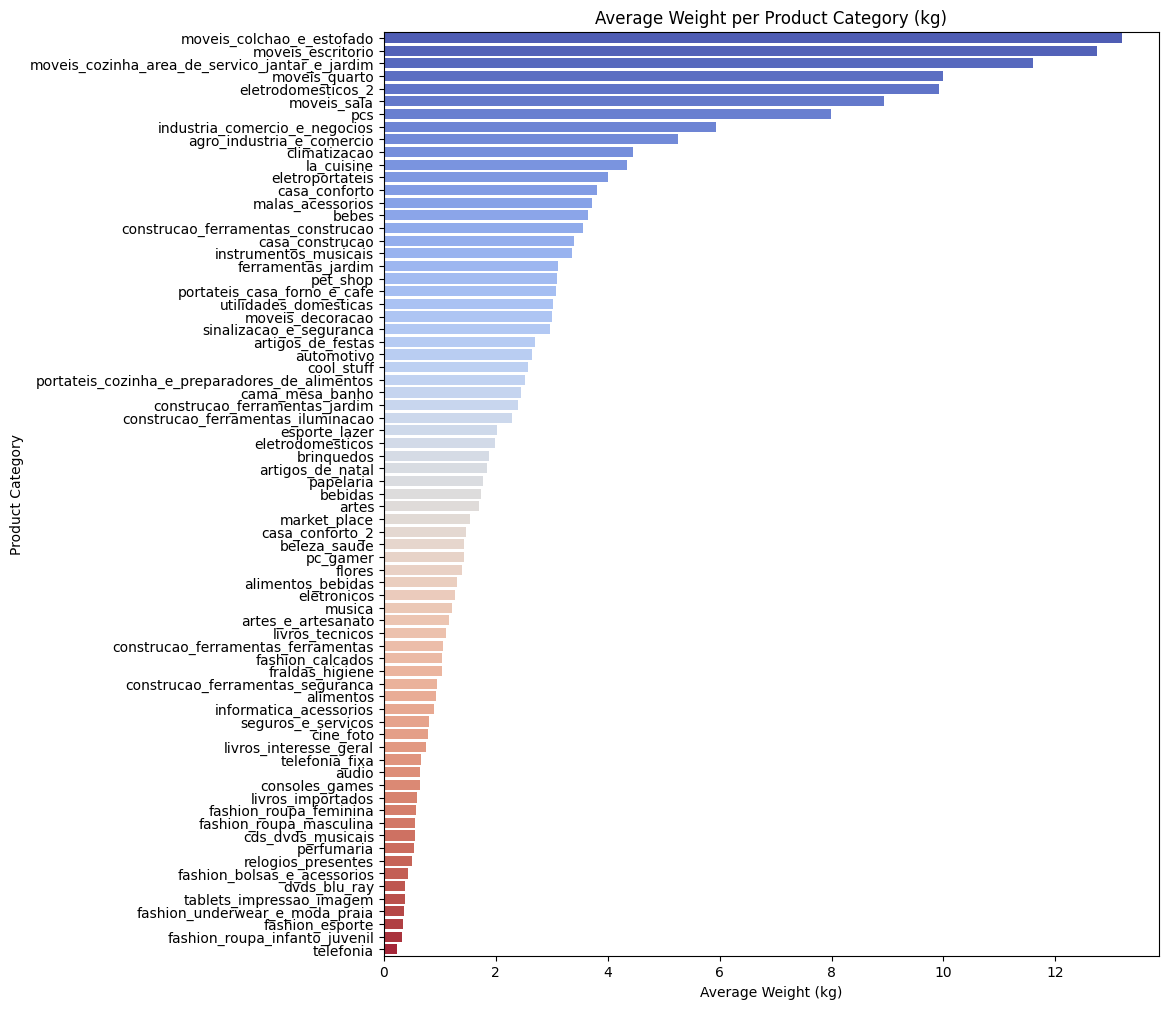

In [19]:
# Query to get average weight for all product categories
query = """
SELECT product_category_name,
       AVG(product_weight_g)/1000 AS avg_weight_kg
FROM products_df
WHERE product_weight_g IS NOT NULL
GROUP BY product_category_name
ORDER BY avg_weight_kg DESC
"""
# Run the query
result = sqldf(query, globals())

# Plot horizontal bar chart
plt.figure(figsize=(10, 12))
sns.barplot(x='avg_weight_kg', y='product_category_name', data=result, palette='coolwarm')
plt.title('Average Weight per Product Category (kg)')
plt.xlabel('Average Weight (kg)')
plt.ylabel('Product Category')
plt.show()

### 3. Which month in 2017 had the highest sales?

In [20]:
# 3. Which month in 2017 had the highest sales?

query = """
SELECT strftime('%Y-%m', o.order_purchase_timestamp) AS order_month,
       SUM(oi.price) AS total_sales
FROM orders_df AS o
JOIN order_items_df AS oi
ON o.order_id = oi.order_id
WHERE strftime('%Y', o.order_purchase_timestamp) = '2017'
GROUP BY order_month
ORDER BY total_sales DESC
LIMIT 1
"""
result = sqldf(query, globals())
result

,order_month,total_sales
0,2017-11,1010271.37


<ipython-input-21-86ec9c0f2ae5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='order_month', y='total_sales', data=result, palette='Greens_d')


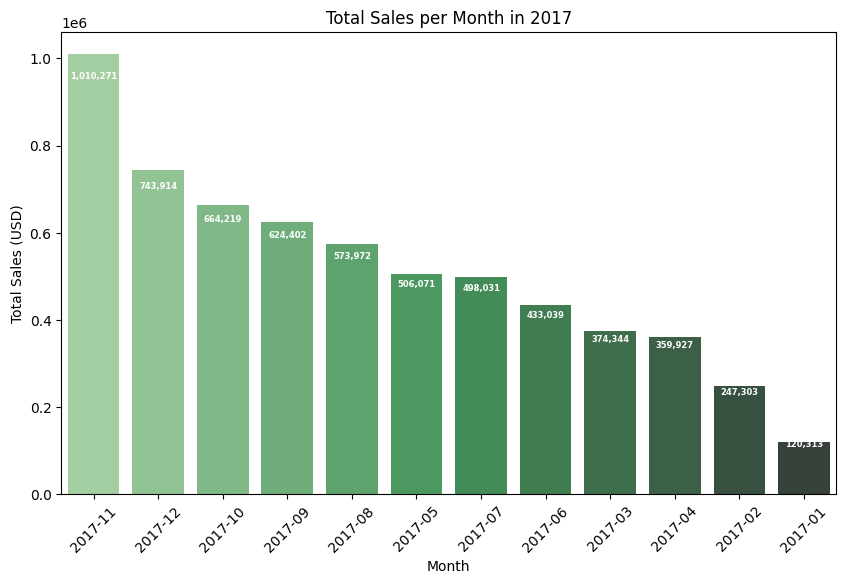

In [21]:
# Data - Highest Sales Month in 2017
query = """
SELECT strftime('%Y-%m', o.order_purchase_timestamp) AS order_month,
       SUM(oi.price) AS total_sales
FROM orders_df AS o
JOIN order_items_df AS oi
ON o.order_id = oi.order_id
WHERE strftime('%Y', o.order_purchase_timestamp) = '2017'
GROUP BY order_month
ORDER BY total_sales DESC
"""
result = sqldf(query, globals())

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='order_month', y='total_sales', data=result, palette='Greens_d')

# Add labels inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height() - (p.get_height() * 0.05)),  # Position label inside
                ha='center', va='center',
                fontsize=6, color='white', fontweight='bold')

plt.xticks(rotation=45)
plt.title('Total Sales per Month in 2017')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.show()

### 4. What is the average review score per month H2 2017?


In [22]:
# 4. What is the average review score per month H2 2017?

query = """
SELECT strftime('%Y-%m', review_creation_date) AS review_month,
       AVG(review_score) AS avg_review_score
FROM order_reviews_df
WHERE strftime('%Y-%m', review_creation_date) BETWEEN '2017-07' AND '2017-12'
GROUP BY review_month
"""
result = sqldf(query, globals())
result

,review_month,avg_review_score
0,2017-07,4.183271
1,2017-08,4.224961
2,2017-09,4.182424
3,2017-10,4.182188
4,2017-11,4.114919
5,2017-12,3.931596


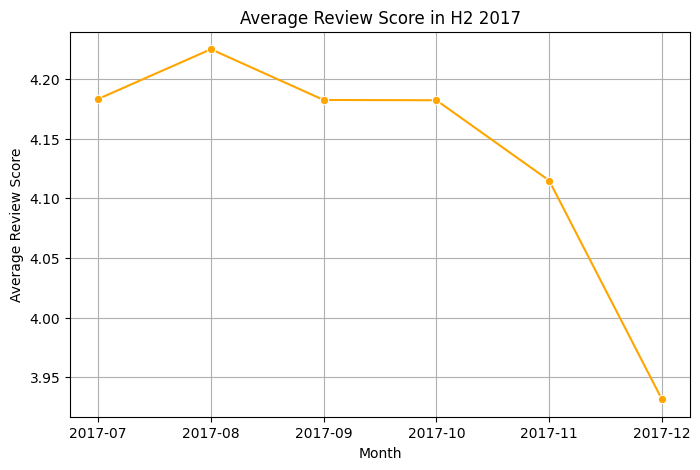

In [23]:
# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x='review_month', y='avg_review_score', data=result, marker='o', color='orange')
plt.title('Average Review Score in H2 2017')
plt.xlabel('Month')
plt.ylabel('Average Review Score')
plt.grid(True)
plt.show()

### 5. Which state has the highest number of sellers per city?

In [24]:
#  5. Which state has the highest number of sellers per city?

query = """
SELECT seller_state, seller_city, COUNT(seller_id) AS total_sellers
FROM sellers_df
GROUP BY seller_state, seller_city
ORDER BY total_sellers DESC
LIMIT 1
"""
result = sqldf(query, globals())
result

,seller_state,seller_city,total_sellers
0,SP,sao paulo,694


<ipython-input-25-03b509c8b49c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='seller_city', y='total_sellers', data=result, palette='coolwarm')


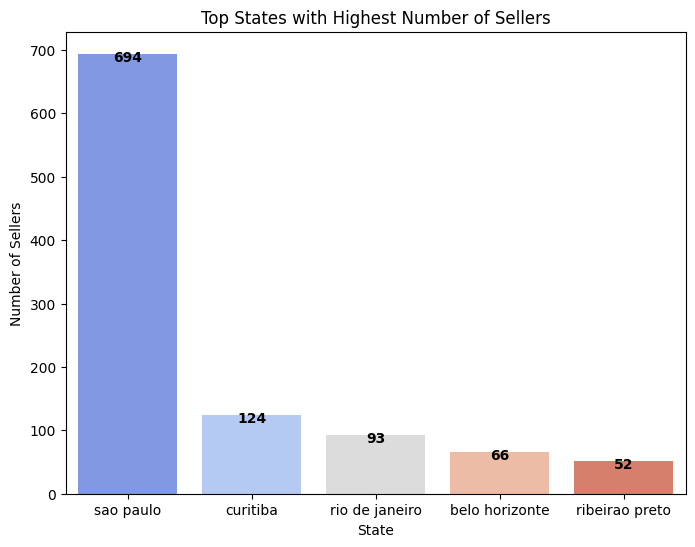

In [25]:
# Data - Top State with Highest Seller Count
query = """
SELECT seller_state, seller_city,
       COUNT(seller_id) AS total_sellers
FROM sellers_df
GROUP BY seller_state, seller_city
ORDER BY total_sellers DESC
LIMIT 5
"""
result = sqldf(query, globals())

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='seller_city', y='total_sellers', data=result, palette='coolwarm')

# Add labels inside the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() - 5),  # Position label inside
                ha='center', va='center',
                fontsize=10, color='black', fontweight='bold')

plt.title('Top States with Highest Number of Sellers')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.show()

### Intermediate Questions

### 1. How many states have more than 300 customers in 2018?

In [26]:
# 1. How many states have more than 300 customers in 2018?

query = """
SELECT c.customer_state,
       COUNT(DISTINCT c.customer_unique_id) AS total_customers
FROM orders_df AS o
JOIN customers_df AS c
ON o.customer_id = c.customer_id
WHERE strftime('%Y', o.order_purchase_timestamp) = '2018'
GROUP BY c.customer_state
HAVING total_customers > 300
"""
result = sqldf(query, globals())
result

,customer_state,total_customers
0,BA,1741
1,CE,661
2,DF,1182
3,ES,1039
4,GO,1030
5,MA,351
6,MG,6042
7,MS,407
8,MT,470
9,PA,459


<ipython-input-27-e628032e607d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='customer_state', y='total_customers', data=result, palette='coolwarm')


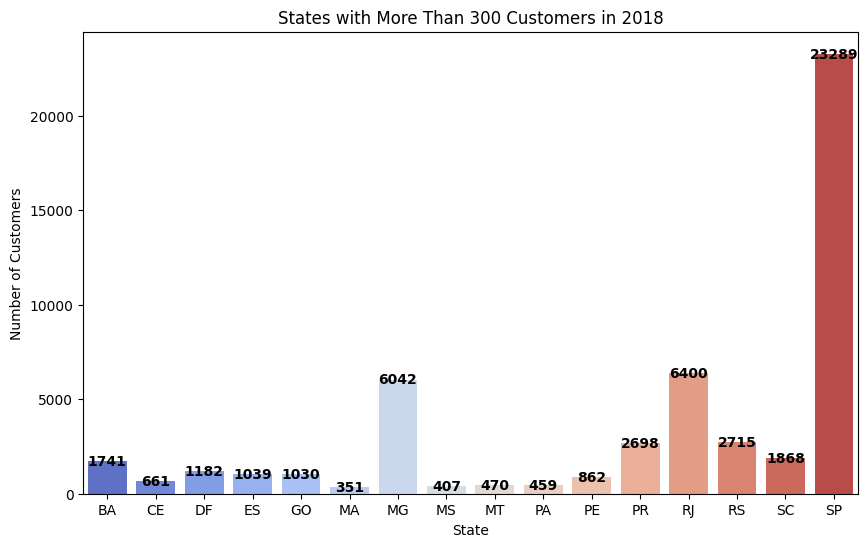

In [27]:
# Data - States with More Than 300 Customers in 2018
query = """
SELECT c.customer_state,
       COUNT(DISTINCT c.customer_unique_id) AS total_customers
FROM orders_df AS o
JOIN customers_df AS c
ON o.customer_id = c.customer_id
WHERE strftime('%Y', o.order_purchase_timestamp) = '2018'
GROUP BY c.customer_state
HAVING total_customers > 300
"""
result = sqldf(query, globals())

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='customer_state', y='total_customers', data=result, palette='coolwarm')

# Add labels inside the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() - 15),
                ha='center', va='center',
                fontsize=10, color='black', fontweight='bold')

plt.title('States with More Than 300 Customers in 2018')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()


### 2. How many mediums of origin had more than 200 leads from 2017 to 2018?

In [28]:
#  2. How many mediums of origin had more than 200 leads from 2017 to 2018?

query = """
SELECT origin,
       COUNT(mql_id) AS total_leads
FROM marketing_leads_df AS mql
WHERE strftime('%Y', mql.first_contact_date) BETWEEN '2017' AND '2018'
GROUP BY origin
HAVING total_leads > 200
"""
result = sqldf(query, globals())
result

,origin,total_leads
0,direct_traffic,499
1,email,493
2,organic_search,2296
3,paid_search,1586
4,referral,284
5,social,1350
6,unknown,1099


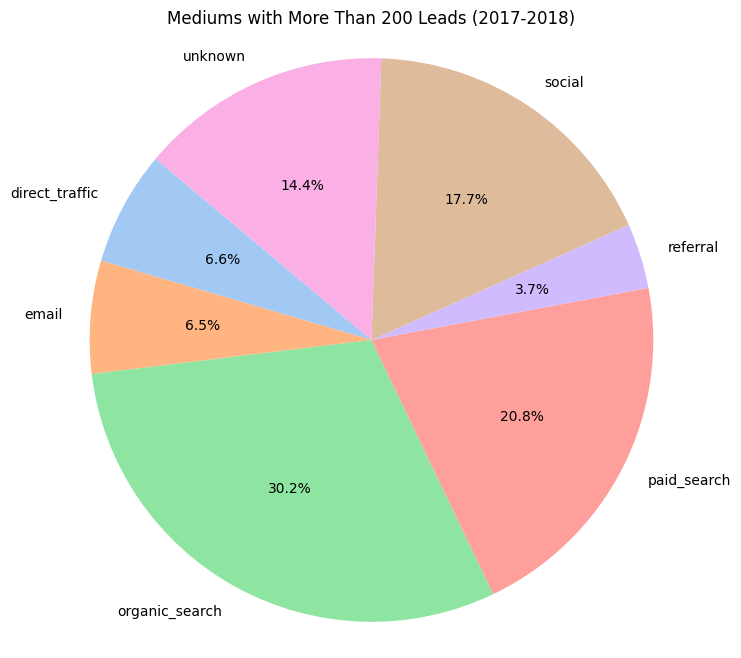

In [29]:
# Query to get mediums with more than 200 leads
query = """
SELECT origin,
       COUNT(mql_id) AS total_leads
FROM marketing_leads_df AS mql
WHERE strftime('%Y', mql.first_contact_date) BETWEEN '2017' AND '2018'
GROUP BY origin
HAVING total_leads > 200
"""
# Run query
result = sqldf(query, globals())

# Check if result is valid
if result.empty:
    print("No data found!")
else:
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(result['total_leads'],
            labels=result['origin'],
            autopct='%1.1f%%',
            colors=sns.color_palette('pastel'),
            startangle=140)
    plt.title('Mediums with More Than 200 Leads (2017-2018)')
    plt.axis('equal')  # Ensure pie is drawn as a circle
    plt.show()

### 3.  What is the average review score for orders greater than the average value in H1 of 2018?

In [30]:
# 3.  What is the average review score for orders greater than the average value in H1 of 2018?

# Get average order value for H1 2018
query_avg = """
SELECT AVG(oi.price) AS avg_price
FROM orders_df AS o
JOIN order_items_df AS oi
ON o.order_id = oi.order_id
WHERE strftime('%Y-%m', o.order_purchase_timestamp) BETWEEN '2018-01' AND '2018-06'
"""
avg_result = sqldf(query_avg, globals())
avg_price = avg_result.iloc[0]['avg_price']

# Main query to get average review score for orders > avg_price
query = f"""
SELECT AVG(orw.review_score) AS avg_review_score
FROM order_reviews_df AS orw
JOIN orders_df AS o
ON orw.order_id = o.order_id
JOIN order_items_df AS oi
ON o.order_id = oi.order_id
WHERE strftime('%Y-%m', o.order_purchase_timestamp) BETWEEN '2018-01' AND '2018-06'
AND oi.price > {avg_price}
"""
result = sqldf(query, globals())
result

,avg_review_score
0,3.959568


<ipython-input-31-8bcaf7cc641f>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='order_month', y='avg_review_score', data=result, palette='Oranges_d')


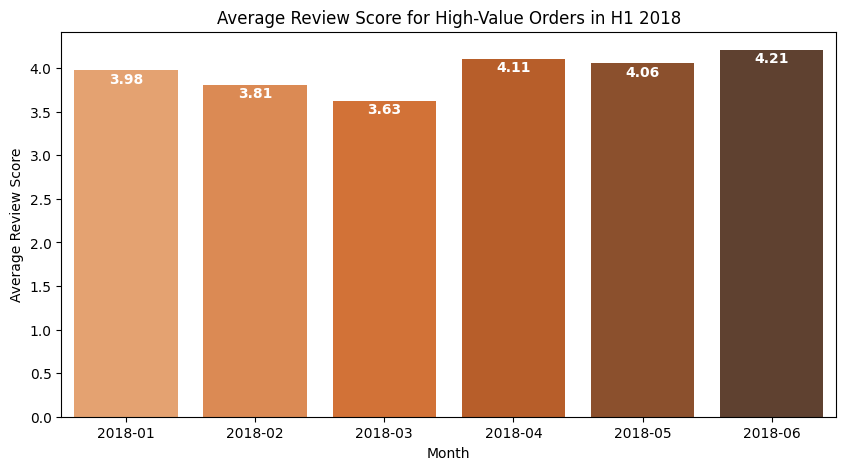

In [31]:
# Get average order value for H1 2018
query_avg = """
SELECT AVG(oi.price) AS avg_price
FROM orders_df AS o
JOIN order_items_df AS oi
ON o.order_id = oi.order_id
WHERE strftime('%Y-%m', o.order_purchase_timestamp) BETWEEN '2018-01' AND '2018-06'
"""
avg_result = sqldf(query_avg, globals())
avg_price = avg_result.iloc[0]['avg_price']

# Main query to get average review score for orders > avg_price
query = f"""
SELECT strftime('%Y-%m', o.order_purchase_timestamp) AS order_month,
       AVG(orw.review_score) AS avg_review_score
FROM order_reviews_df AS orw
JOIN orders_df AS o
ON orw.order_id = o.order_id
JOIN order_items_df AS oi
ON o.order_id = oi.order_id
WHERE strftime('%Y-%m', o.order_purchase_timestamp) BETWEEN '2018-01' AND '2018-06'
AND oi.price > {avg_price}
GROUP BY order_month
"""
result = sqldf(query, globals())

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='order_month', y='avg_review_score', data=result, palette='Oranges_d')

# Add labels inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.1),
                ha='center', va='center',
                fontsize=10, color='white', fontweight='bold')

plt.title('Average Review Score for High-Value Orders in H1 2018')
plt.xlabel('Month')
plt.ylabel('Average Review Score')
plt.show()

### 4. What is the monthly running total payment volume for ‘credit_card’ in 2017?

In [32]:
# 4. What is the monthly running total payment volume for ‘credit_card’ in 2017?

query = """
SELECT strftime('%Y-%m', o.order_purchase_timestamp) AS order_month,
       SUM(op.payment_value) AS total_payment
FROM orders_df AS o
JOIN order_payments_df AS op
ON o.order_id = op.order_id
WHERE op.payment_type = 'credit_card'
AND strftime('%Y', o.order_purchase_timestamp) = '2017'
GROUP BY order_month
ORDER BY order_month
"""
# Get payment data
result = sqldf(query, globals())

# Add running total column
result['running_total'] = result['total_payment'].cumsum()
result

,order_month,total_payment,running_total
0,2017-01,109615.68,109615.68
1,2017-02,226753.56,336369.24
2,2017-03,354488.94,690858.18
3,2017-04,322087.72,1012945.90
4,2017-05,445047.31,1457993.21
5,2017-06,388268.27,1846261.48
6,2017-07,454988.47,2301249.95
7,2017-08,521595.69,2822845.64
8,2017-09,574484.15,3397329.79
9,2017-10,614327.89,4011657.68


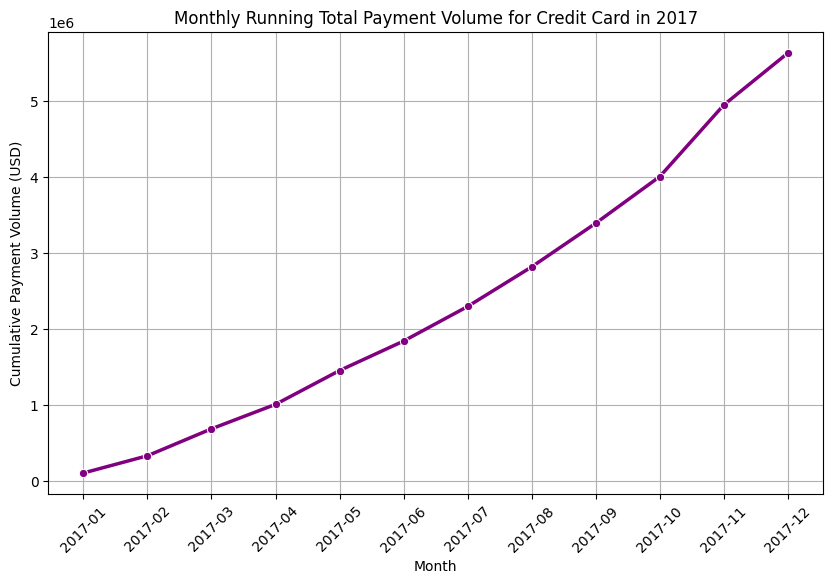

In [33]:
# Data - Monthly Running Total Payment for Credit Card in 2017
query = """
SELECT strftime('%Y-%m', o.order_purchase_timestamp) AS order_month,
       SUM(op.payment_value) AS total_payment
FROM orders_df AS o
JOIN order_payments_df AS op
ON o.order_id = op.order_id
WHERE op.payment_type = 'credit_card'
AND strftime('%Y', o.order_purchase_timestamp) = '2017'
GROUP BY order_month
ORDER BY order_month
"""
# Get payment data
result = sqldf(query, globals())

# Add running total column
result['running_total'] = result['total_payment'].cumsum()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_month', y='running_total', data=result, marker='o', color='purple', linewidth=2.5)
plt.title('Monthly Running Total Payment Volume for Credit Card in 2017')
plt.xlabel('Month')
plt.ylabel('Cumulative Payment Volume (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Intermediate Questions

### 1. Which 3 cities have the lowest cancellation rate? What is their respective total payment volume in 2017?


In [34]:
# 1. Which 3 cities have the lowest cancellation rate? What is their respective total payment volume in 2017?

query = """
SELECT c.customer_city,
       COUNT(CASE WHEN o.order_status = 'canceled' THEN 1 ELSE NULL END) * 1.0 / COUNT(o.order_id) AS cancellation_rate,
       SUM(op.payment_value) AS total_payment_volume
FROM orders_df AS o
JOIN customers_df AS c
ON o.customer_id = c.customer_id
JOIN order_payments_df AS op
ON o.order_id = op.order_id
WHERE strftime('%Y', o.order_purchase_timestamp) = '2017'
GROUP BY c.customer_city
ORDER BY cancellation_rate ASC
LIMIT 3
"""
result = sqldf(query, globals())
result

,customer_city,cancellation_rate,total_payment_volume
0,abadia dos dourados,0.0,135.59
1,abaete,0.0,1258.54
2,abaetetuba,0.0,2504.40


<ipython-input-35-931653005e05>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_city', y='total_payment_volume', data=result, ax=ax1, palette='Blues_d')


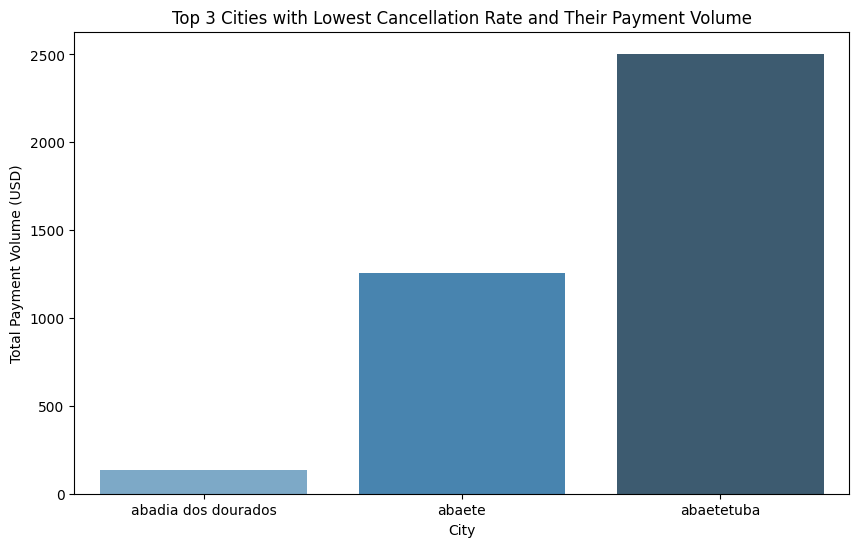

In [35]:
# Data - 3 Cities with Lowest Cancellation Rate and Payment Volume in 2017
query = """
SELECT c.customer_city,
       COUNT(CASE WHEN o.order_status = 'canceled' THEN 1 ELSE NULL END) * 1.0 / COUNT(o.order_id) AS cancellation_rate,
       SUM(op.payment_value) AS total_payment_volume
FROM orders_df AS o
JOIN customers_df AS c
ON o.customer_id = c.customer_id
JOIN order_payments_df AS op
ON o.order_id = op.order_id
WHERE strftime('%Y', o.order_purchase_timestamp) = '2017'
GROUP BY c.customer_city
ORDER BY cancellation_rate ASC
LIMIT 3
"""
result = sqldf(query, globals())

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for payment volume
sns.barplot(x='customer_city', y='total_payment_volume', data=result, ax=ax1, palette='Blues_d')
ax1.set_xlabel('City')
ax1.set_ylabel('Total Payment Volume (USD)')
ax1.set_title('Top 3 Cities with Lowest Cancellation Rate and Their Payment Volume')

# Add cancellation rate labels above bars
# Add cancellation rate labels above bars correctly
for i, p in enumerate(ax1.patches):
    ax1.annotate(f'{result.loc[i, "cancellation_rate"]:.2%}',  # Use i instead of p.get_x()
                 (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                 ha='center', va='center', fontsize=10, color='black')


### 2.  What is the average payment value per payment type for orders from sellers from Rio de Janeiro with a review score of at least 4?

In [36]:
# 2.  What is the average payment value per payment type for orders from sellers from Rio de Janeiro with a review score of at least 4?

query = """
SELECT op.payment_type,
       AVG(op.payment_value) AS avg_payment_value
FROM order_payments_df AS op
JOIN order_items_df AS oi
ON op.order_id = oi.order_id
JOIN order_reviews_df AS orw
ON op.order_id = orw.order_id
JOIN sellers_df AS s
ON oi.seller_id = s.seller_id
WHERE s.seller_state = 'RJ'
AND orw.review_score >= 4
GROUP BY op.payment_type
"""
result = sqldf(query, globals())
result

,payment_type,avg_payment_value
0,boleto,178.114967
1,credit_card,231.510472
2,debit_card,324.515172
3,voucher,64.485028


<ipython-input-37-55a42b019e45>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='payment_type', y='avg_payment_value', data=result, palette='coolwarm')


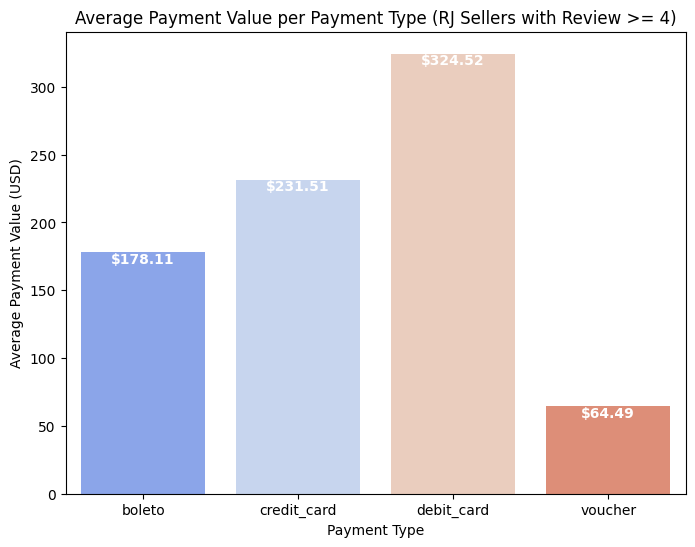

In [37]:
# Data - Average Payment Value per Payment Type for Sellers from Rio de Janeiro
query = """
SELECT op.payment_type,
       AVG(op.payment_value) AS avg_payment_value
FROM order_payments_df AS op
JOIN order_items_df AS oi
ON op.order_id = oi.order_id
JOIN order_reviews_df AS orw
ON op.order_id = orw.order_id
JOIN sellers_df AS s
ON oi.seller_id = s.seller_id
WHERE s.seller_state = 'RJ'
AND orw.review_score >= 4
GROUP BY op.payment_type
"""
result = sqldf(query, globals())

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='payment_type', y='avg_payment_value', data=result, palette='coolwarm')

# Add labels inside the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height() - 5),
                ha='center', va='center',
                fontsize=10, color='white', fontweight='bold')

plt.title('Average Payment Value per Payment Type (RJ Sellers with Review >= 4)')
plt.xlabel('Payment Type')
plt.ylabel('Average Payment Value (USD)')
plt.show()


### 3. How many orders per product type in H1 2017 vs H2 2017? Show each product type in English.

In [38]:
# 3. How many orders per product type in H1 2017 vs H2 2017? Show each product type in English.
query = """
SELECT pct.product_category_name_english,
       SUM(CASE WHEN strftime('%m', o.order_purchase_timestamp) BETWEEN '01' AND '06' THEN 1 ELSE 0 END) AS h1_2017_orders,
       SUM(CASE WHEN strftime('%m', o.order_purchase_timestamp) BETWEEN '07' AND '12' THEN 1 ELSE 0 END) AS h2_2017_orders
FROM order_items_df AS oi
JOIN orders_df AS o
ON oi.order_id = o.order_id
JOIN products_df AS p
ON oi.product_id = p.product_id
JOIN category_translation_df AS pct
ON p.product_category_name = pct.product_category_name
WHERE strftime('%Y', o.order_purchase_timestamp) = '2017'
GROUP BY pct.product_category_name_english
"""
result = sqldf(query, globals())
result

,product_category_name_english,h1_2017_orders,h2_2017_orders
0,agro_industry_and_commerce,17,44
1,air_conditioning,68,62
2,art,24,17
3,arts_and_craftmanship,1,1
4,audio,58,109
...,...,...,...
66,stationery,229,755
67,tablets_printing_image,37,24
68,telephony,838,1360
69,toys,684,1918


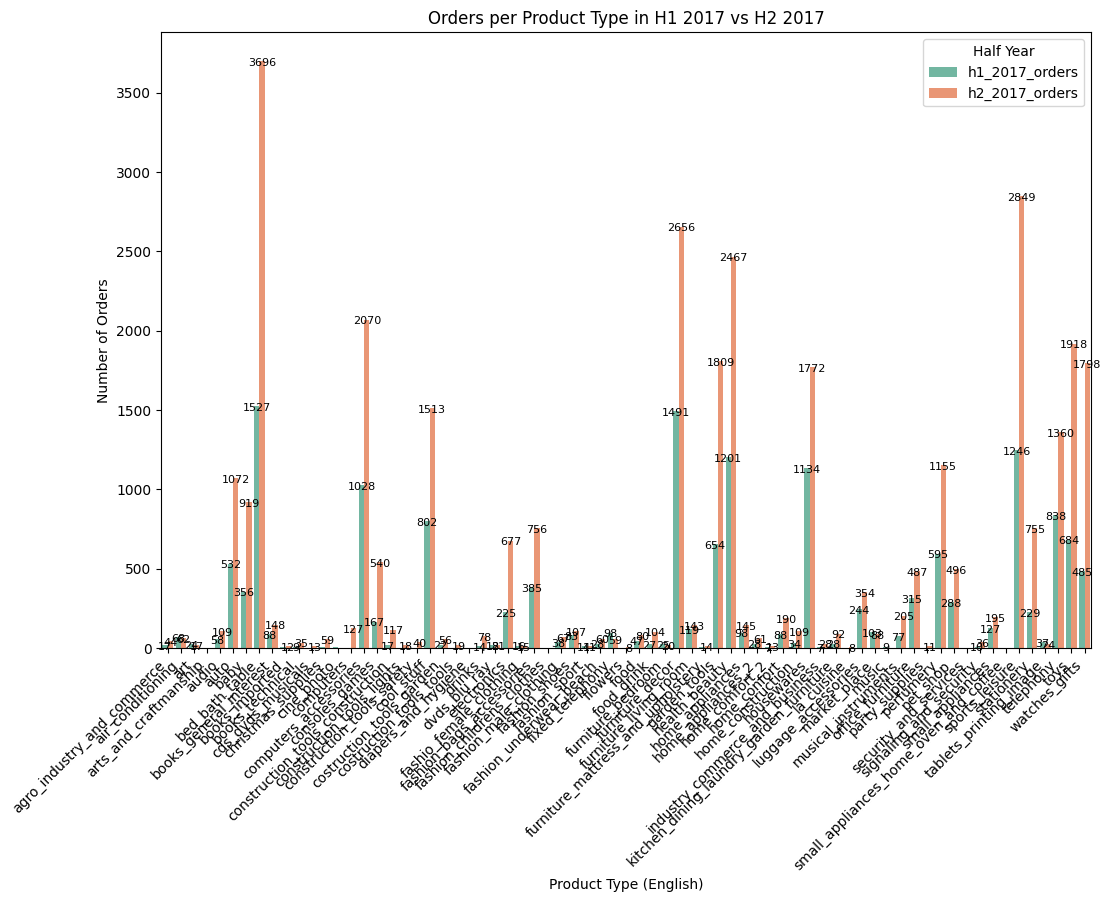

In [39]:
# Data - Orders per Product Type in H1 vs H2 2017
query = """
SELECT pct.product_category_name_english,
       SUM(CASE WHEN strftime('%m', o.order_purchase_timestamp) BETWEEN '01' AND '06' THEN 1 ELSE 0 END) AS h1_2017_orders,
       SUM(CASE WHEN strftime('%m', o.order_purchase_timestamp) BETWEEN '07' AND '12' THEN 1 ELSE 0 END) AS h2_2017_orders
FROM order_items_df AS oi
JOIN orders_df AS o
ON oi.order_id = o.order_id
JOIN products_df AS p
ON oi.product_id = p.product_id
JOIN category_translation_df AS pct
ON p.product_category_name = pct.product_category_name
WHERE strftime('%Y', o.order_purchase_timestamp) = '2017'
GROUP BY pct.product_category_name_english
"""
result = sqldf(query, globals())

# Melt data to prepare for grouped bar chart
result_melted = result.melt(id_vars='product_category_name_english',
                             value_vars=['h1_2017_orders', 'h2_2017_orders'],
                             var_name='half_year', value_name='order_count')

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='product_category_name_english', y='order_count', hue='half_year', data=result_melted, palette='Set2')

# Add labels inside the bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height() - 10),
                    ha='center', va='center',
                    fontsize=8, color='black')

plt.xticks(rotation=45, ha='right')
plt.title('Orders per Product Type in H1 2017 vs H2 2017')
plt.xlabel('Product Type (English)')
plt.ylabel('Number of Orders')
plt.legend(title='Half Year')
plt.show()
